## Binome

- Barry saliou
- Zhang zhile

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div><img src="attachment:sinus2d.png" width=200></div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [3]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
# %matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(400//80,400//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(400/80,400/80))
    if title: plt.title(title)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows to sample signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


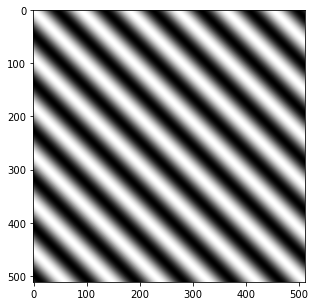

In [4]:
s_45 = sinusoid2d(1, 45, 512, 64, 1)
imshow(s_45)
#surf(s_45)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

<font color="green"> 
We hava :
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta)) = A\cos(2\pi f_0t\cos\theta + 2\pi f_0u\sin\theta)
$$
    
SO:
    
$f_t^{\text{max}} = f_0^{}\cos\theta = f_0^{}\cos\frac{\pi}{4}$
and  
$f_u^{\text{max}} = f_0^{}\sin\theta = f_0^{}\sin\frac{\pi}{4}$

We know that $f_0^{} = \frac{1}{T_0^{}}$ where $T_0^{} = 64$

So $f_t^{\text{max}} =f_u^{\text{max}}= \frac{\sqrt{2}}{128}$

$f_m = \max(f_t^{\text{max}},f_u^{\text{max}}) = 𝑓_0 * {\text{max}}(\cos\frac{\pi}{4}, \sin\frac{\pi}{4}) = \frac{\sqrt{2}}{128}$

According to the  théorème Shannon, It needs $f_e^{} >= 2f_0^{} \iff  f_e^{} >= \frac{\sqrt{2}}{64}$, so we have the limited frequency of the sampling of $s_{45}$ </font>

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

In [6]:
# Définition des paramètres
A = 1  # Amplitude
theta = 45  # Orientation (en degrés)
L = 512  # Taille de l'image
T0 = 64  # Période (T0 = 1 / fréquence fondamentale)

frequence maximale:  0.011048543456039806


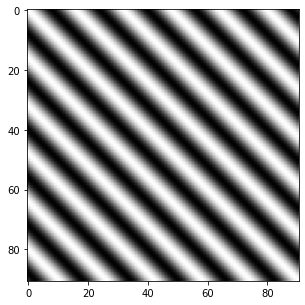

In [7]:
def f_max(theta, T0):
    return max(abs(np.cos(theta / 180 * np.pi)), abs(np.sin(theta / 180 * np.pi))) * 1/T0

f_m = f_max(theta, T0)
print("frequence maximale: ",f_m)

f_s = 16 * f_m # frequence d'echantillonage
T_s = 1/ f_s   # periode d'echantillonage

s_45_16 = sinusoid2d(A, theta, L, T0, T_s)

imshow(s_45_16) 
#surf(s_45_16) 

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

In [8]:
def toVisualizeFT(I):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(fft2(I)))

def toVisualizeLogFT(I):
    """ Array[complex] -> Array[float] """
    return np.log(1 + np.abs(fftshift(fft2(I))))


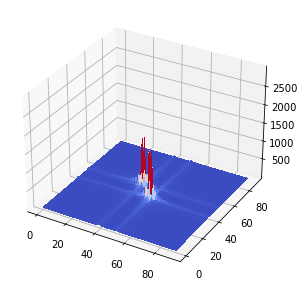

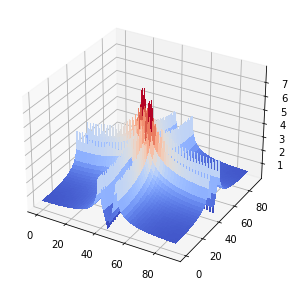

In [9]:
surf(toVisualizeFT(s_45_16)) 
surf(toVisualizeLogFT(s_45_16))

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

In [10]:
def threshold(I,s):
    """ Array*int -> Array """
    
    new_arr = I.copy()
    new_arr[new_arr < s] = 0
    
    return new_arr

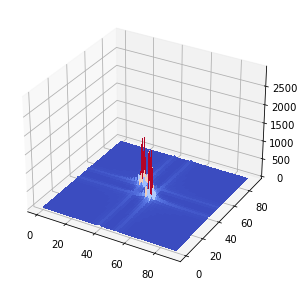

In [11]:
# Verifying the presence of the two Dirac peaks by thresholding the FT of the sampled image to extract the peaks
dirac_peaks = threshold(toVisualizeFT(s_45_16), s_45_16.max())  

# Show surf
surf(dirac_peaks)

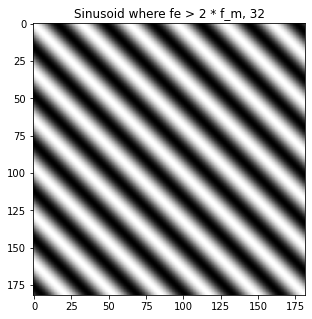

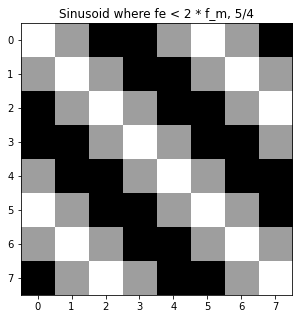

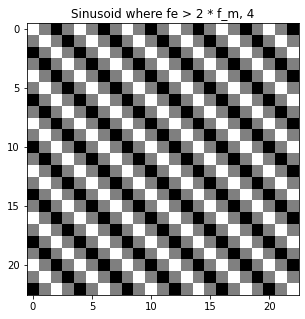

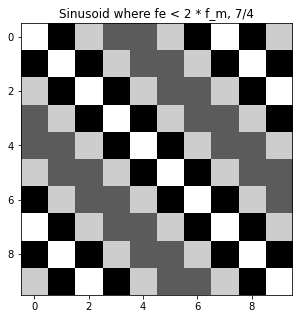

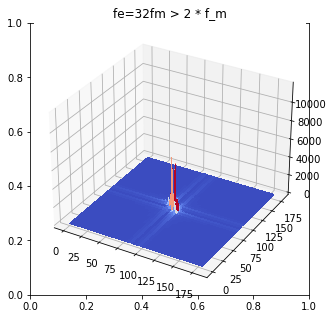

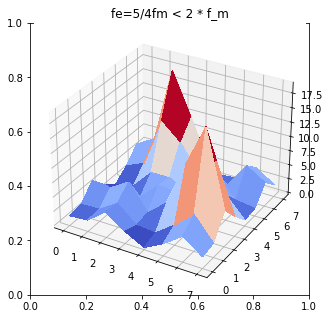

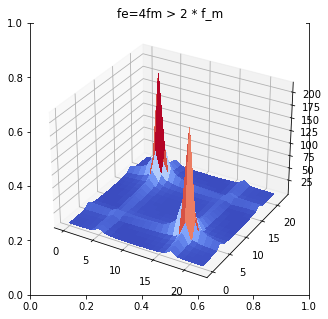

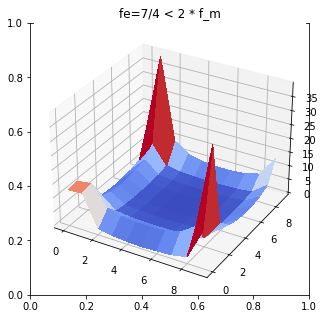

In [33]:
# Various values of Te :
fe_1 = 32 * f_m     # fe > 2 * fm 
fe_2 = (5/4) *f_m   # fe < 2 * fm 
fe_3 = 4 * f_m      # fe > 2 * fm 
fe_4 = (7/4) *f_m   # fe < 2 * fm 

Te_1 = 1 / fe_1
Te_2 = 1 / fe_2
Te_3 = 1 / fe_3
Te_4 = 1 / fe_4

s_45_1 = sinusoid2d(A, theta, L, T0, Te_1)
s_45_2 = sinusoid2d(A, theta, L, T0, Te_2)
s_45_3 = sinusoid2d(A, theta, L, T0, Te_3)
s_45_4 = sinusoid2d(A, theta, L, T0, Te_4)


imshow(s_45_1, "Sinusoid where fe > 2 * f_m, 32")
imshow(s_45_2, "Sinusoid where fe < 2 * f_m, 5/4")
imshow(s_45_3, "Sinusoid where fe > 2 * f_m, 4")
imshow(s_45_4, "Sinusoid where fe < 2 * f_m, 7/4")

surf(toVisualizeFT(s_45_1),"fe=32fm > 2 * f_m")
surf(toVisualizeFT(s_45_2),"fe=5/4fm < 2 * f_m")
surf(toVisualizeFT(s_45_3),"fe=4fm > 2 * f_m")
surf(toVisualizeFT(s_45_4),"fe=7/4 < 2 * f_m")

```In this test, we explored various values of Te while ensuring the critical Nyquist condition: when fe > 2 * f_m (sampling frequency exceeds twice the maximum frequency f_m), the two Dirac peaks in the spectrum remain visible and intact, faithfully representing the image's spatial frequencies. Conversely, when fe falls below 2 * f_m, as demonstrated by Te_2, the two Dirac peaks are truncated, emphasizing the vital importance of adhering to the Nyquist criterion. This condition ensures that the sampling frequency is high enough to capture fine details in the image, as illustrated through the generation of sinusoidal signals, s_45_1 and s_45_2, and their corresponding visual representations in both time and frequency domains. ```

Bonues question: 

```There are two possibilities to have the presence of structures or lobes, one is the lobes could be a result of aliasing, we under-sampled the high-frequency portion of the signal; another is noise```

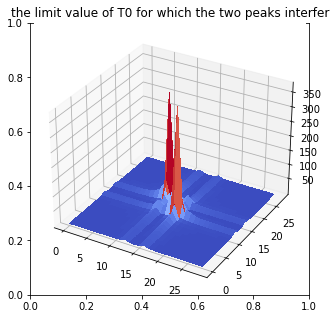

In [100]:
T_limit = 200
surf(toVisualizeFT(sinusoid2d(A, theta, L, T_limit, 1/(16*f_max(45, T_limit)))), title="the limit value of T0 for which the two peaks interfer")

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

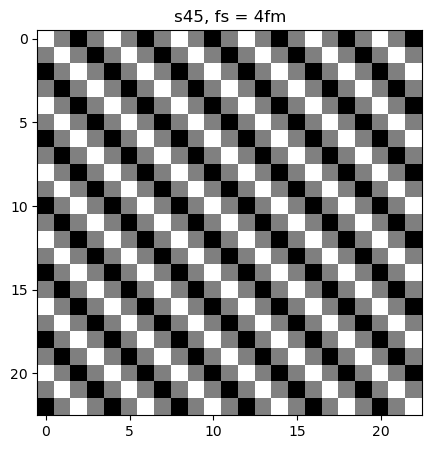

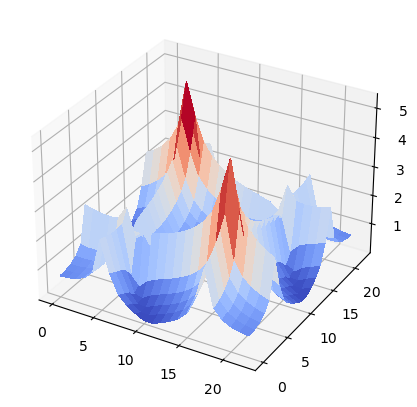

In [30]:
T_4 = 1 / (4 * f_m)
s_45_4 = sinusoid2d(A, theta, L, T0, T_4)
imshow(s_45_4, title="s45, fs = 4fm")
surf(toVisualizeLogFT(s_45_4))

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [31]:
def error(Xd, Xr, A, L):    
    return  np.sum(np.abs(Xr - Xd)) / (2 * A * L * L)

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

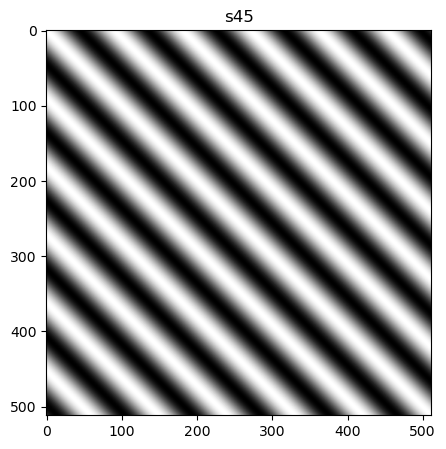

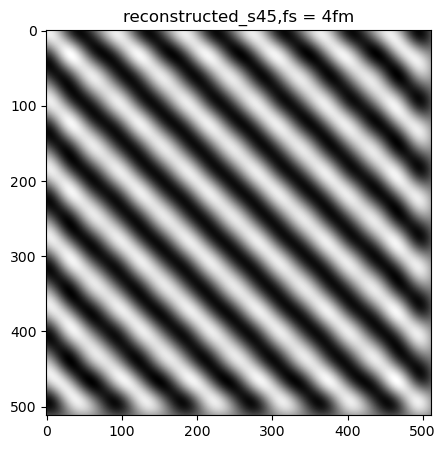

Average relative error between the two signals :  0.022936924363103007


In [32]:
reconstructed_signal = shannonInterpolation(s_45_4, T_4, L)
imshow(s_45,title="s45")
imshow(reconstructed_signal,title="reconstructed_s45,fs = 4fm")
print("Average relative error between the two signals : ", error(s_45, reconstructed_signal, A, L))

```For this error, our understanding is that when we sample, even if we use Shannon's theorem with a frequency greater than twice the maximum frequency to sample, it still has a sampling error, and does not mean that it can be 100% error-free sampling to all the details of the image and the information, so in the reconstruction of the sampling error leads to the reconstructed image and the original image error.```
```However, we can see that the error is very small when sampling using 4 times the frequency of the maximum frequency.```

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

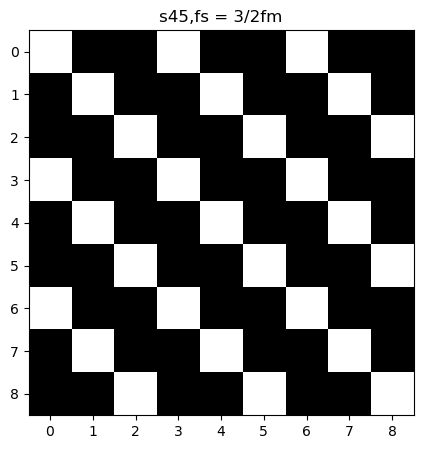

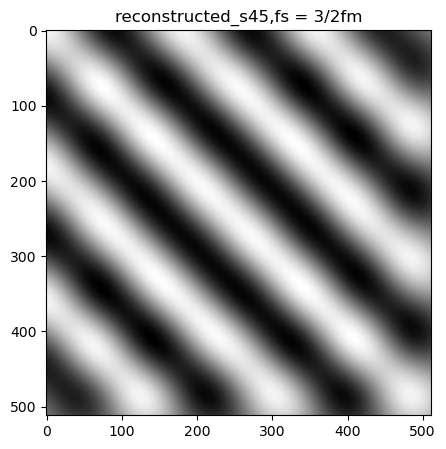

Average relative error between the two signals : 0.4068626475014588


In [33]:
T_3 = 1 /( (3/2) * f_m)
s_45_3 = sinusoid2d(A, theta, L, T0, T_3)

imshow(s_45_3, title="s45,fs = 3/2fm")
reconstructed_signal_3 = shannonInterpolation(s_45_3, T_3, L)


imshow(reconstructed_signal_3,title="reconstructed_s45,fs = 3/2fm")
print("Average relative error between the two signals :",error(s_45, reconstructed_signal_3, A, L))

```When using small versus twice the maximum frequency sampling, we can clearly see that the details and edges of the reconstructed image are very blurred and the error is large, which is due to insufficient sampling, resulting in the high frequency portion of the image not being sampled. ```

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

<font color="green"> 
We have :
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta)) = A\cos(2\pi f_0t\cos\theta + 2\pi f_0u\sin\theta)
$$
    
So:

$ \theta = \frac{\pi}{180} * 10°$ 

$f_t^{\text{max}} = f_0^{}\cos\theta = f_0^{}\cos\frac{\pi}{18}$
and 
$f_u^{\text{max}} = f_0^{}\sin\theta = f_0^{}\sin\frac{\pi}{18}$

We know that $f_0^{} = \frac{1}{T_0^{}}$ where $T_0^{} = 64$

So $f_t^{\text{max}} = 0.984807753012208 * \frac{1}{64}$    and     $f_u^{\text{max}}= 0.17364817766693033 * \frac{1}{64}$

$f_m = \max(f_t^{\text{max}},f_u^{\text{max}}) = 0.984807753012208 *  \frac{1}{64} = 0.01538762114081575$

According to the  théorème Shannon, It needs $f_e^{} >= 2f_0^{} \iff  f_e^{} >= 0.0307752422816315$, so we have the limited frequency of the sampling of $s_{10}$ </font>

frequence maximale:  0.01538762114081575


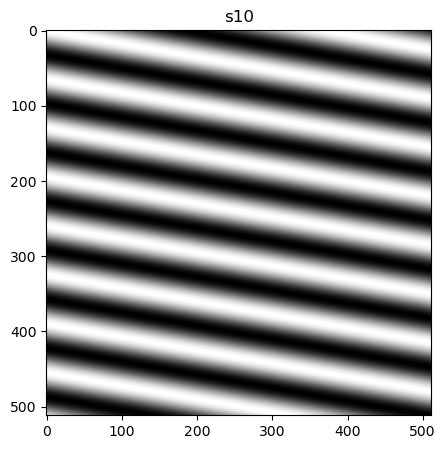

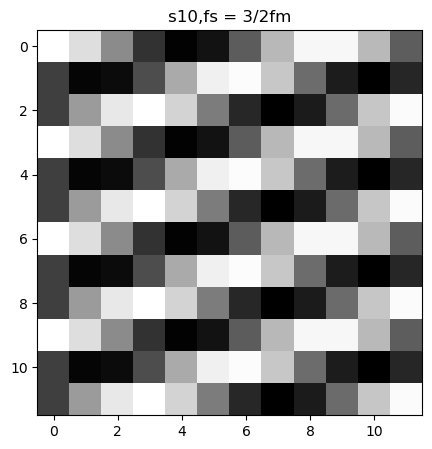

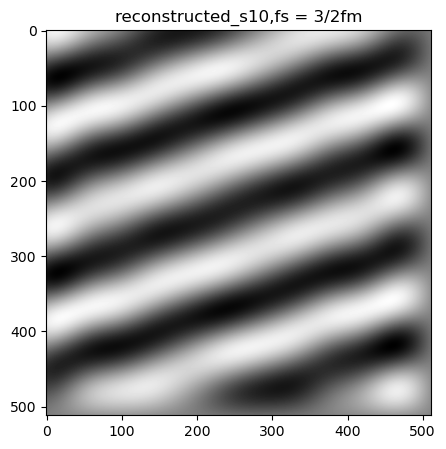

Average relative error between the two signals : 0.3982390747439288


In [34]:
theta_10 = 10 # Orientation (en degrés)

f10_m = f_max(theta_10, T0) # frequence maximale
print("frequence maximale: ",f10_m)

f10_s = (3/2) * f10_m
T_10 = 1 / f10_s

s_10 = sinusoid2d(A, theta_10, L, T0, 1)
s10_sampled = sinusoid2d(A, theta_10, L, T0, T_10)

r10_signal = shannonInterpolation(s10_sampled, T_10, L)

imshow(s_10,title="s10")  
imshow(s10_sampled,title="s10,fs = 3/2fm")
imshow(r10_signal,title="reconstructed_s10,fs = 3/2fm")

print("Average relative error between the two signals :",error(s_10, r10_signal, A, L))

```We can find that because the frequency of sampling is not greater than the limiting sampling frequency, it leads to a completely wrong oriention of the reconstructed image after sampling, and the oriention of```  $\theta'$ ```of the reconstructed image is ``` $>= 90°$

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$

In [35]:
from time import process_time
mytime = 0


def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()





## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [101]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 


```
Subsampling by a factor of 2 involves reducing the resolution of an image by selecting every other pixel in both the horizontal and vertical directions. In other words, this means that the resulting image will have half the width and half the height of the original image.```

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

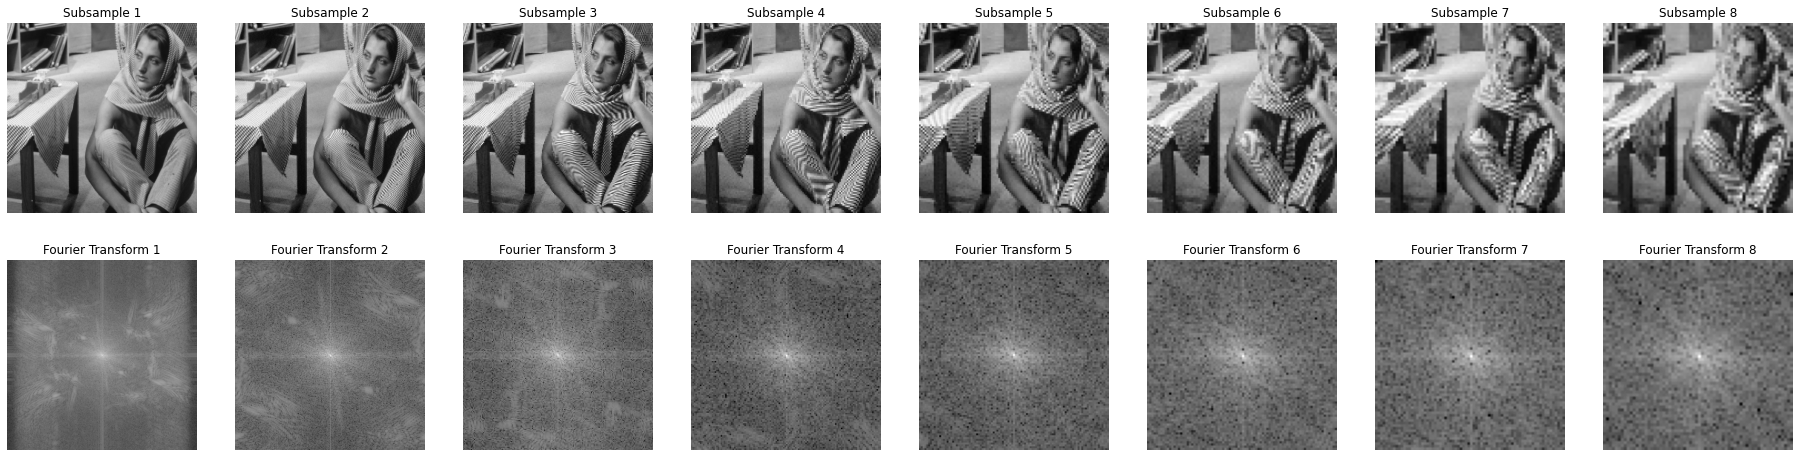

In [102]:
import matplotlib.pyplot as plt

def subSampleN(I, n):
    """
    Subsample an image 'n' times, compute and display the Fourier transform for each subsampling level.
    
    Parameters:
    I (array): The input image.
    n (int): The number of subsampling levels.

    Returns:
    None
    """
    fig, axes = plt.subplots(2, n, figsize=(4 * n, 8))
    
    for i in range(1, n + 1):
        tmp = I[::i, ::i]
        
        ax = axes[0, i - 1]
        ax.imshow(tmp, cmap='gray')
        ax.set_title(f'Subsample {i}')
        ax.axis('off')

        ax = axes[1, i - 1]
        tmpShift = toVisualizeLogFT(tmp)
        ax.imshow(tmpShift, cmap='gray')
        ax.set_title(f'Fourier Transform {i}')
        ax.axis('off')

# Example usage:
subSampleN(barbara, 8)


<tt> As we increase the level of image subsampling, the image's resolution decreases, resulting in blurriness, particularly visible in the spectral representation. This is due to aliasing, where high-frequency components fold back into lower frequencies when the input signal exceeds half the sampling frequency</tt>

3. Bonus question: same question with the image `img/mandrill.png`.

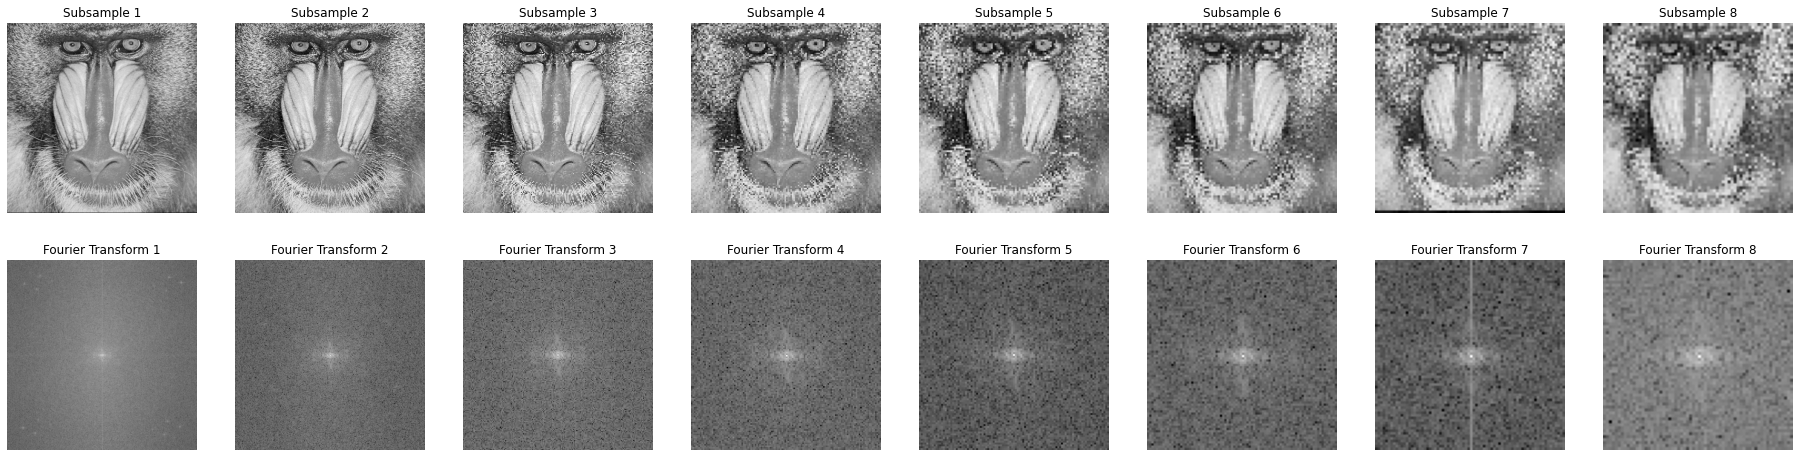

In [103]:
mandrill = np.array(Image.open('img/mandrill.png'))

subSampleN(mandrill, 8)